Taller 1 Métodos Computacionales 2
Catalina Fuentes y Silvana Archila

Pregunta #1


In [44]:
import numpy as np

def transformada_discreta(y_k, t_k, f):
    N = len(t_k)
    suma = 0.+0j
    for i in range (N):
        suma += y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
    return suma


In [45]:
t_k = np.linspace(0,20,200)
y_k = np.sin(t_k)
f = 0.1

x = transformada_discreta(y_k,t_k,f)
print(x)

(10.18289058873271-9.43536532570872j)


Pregunta #2

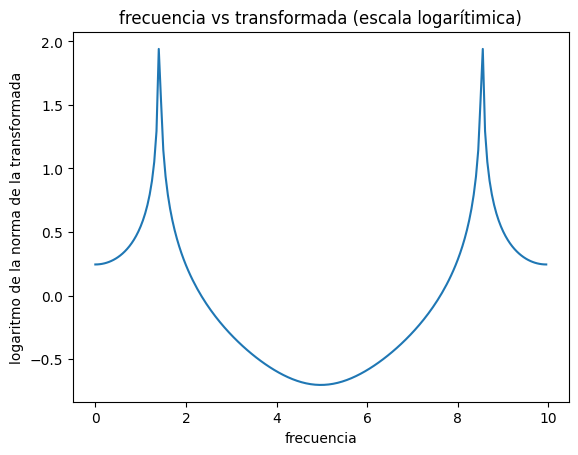

In [46]:
#GRÁFICA SEÑAL DE PRUEBA
import matplotlib.pyplot as plt
t_k = np.linspace(0,20,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(t_k[1]), 200)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)
normalog = np.log10(norma)

plt.plot(f,normalog)
plt.title("frecuencia vs transformada (escala logarítimica)")
plt.xlabel("frecuencia")
plt.ylabel("logaritmo de la norma de la transformada")
plt.show()


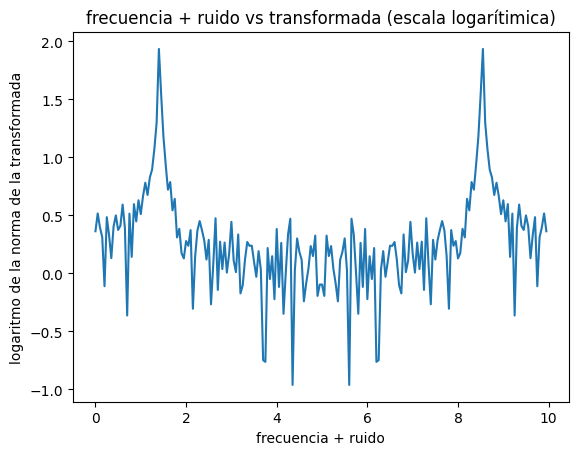

In [47]:
#GRÁFICA CON RUIDO EN Y
y_ruido = np.random.normal(0.0,0.1,len(y_k))
x = transformada_discreta(y_k + y_ruido,t_k,f)
norma = abs(x)
normalog = np.log10(norma)

plt.plot(f,normalog)
plt.title("frecuencia + ruido vs transformada (escala logarítimica)")
plt.xlabel("frecuencia + ruido")
plt.ylabel("logaritmo de la norma de la transformada")
plt.show()

Pregunta #3

In [ ]:
#Hallar pico de media altura 